In [ ]:
%pip install yfinance pandas numpy matplotlib seaborn scikit-learn pmdarima statsmodels

In [ ]:
pip install --upgrade numpy pandas statsmodels pmdarima

In [17]:
import yfinance as yf
import pandas as pd

# List of stocks
stocks = ["MSTR", "AAPL", "TSLA", "INTC", "MCD", "KO", "NKE"]

# Function to fetch and save data for each stock
def fetch_stock_data(stocks):
    for stock in stocks:
        ticker = yf.Ticker(stock)
        # Fetch historical market data
        hist = ticker.history(period="10y")  # Adjust the period as needed
        # Adding extra details to the dataset
        hist['Ticker'] = stock
        hist['Market Cap'] = ticker.info.get("marketCap", "N/A")
        hist['P/E Ratio'] = ticker.info.get("trailingPE", "N/A")
        hist['Dividend Yield'] = ticker.info.get("dividendYield", "N/A")
        hist['52-Week High'] = ticker.info.get("fiftyTwoWeekHigh", "N/A")
        hist['52-Week Low'] = ticker.info.get("fiftyTwoWeekLow", "N/A")
        
        # Save to CSV
        filename = f"{stock}_data.csv"
        hist.to_csv(filename)
        print(f"Saved {filename}")

# Run the function
fetch_stock_data(stocks)

Saved MSTR_data.csv
Saved AAPL_data.csv
Saved TSLA_data.csv
Saved INTC_data.csv
Saved MCD_data.csv
Saved KO_data.csv
Saved NKE_data.csv


In [18]:
def laod_stock_data(stocks):
    all_data = []

    for stock in stocks:
        df = pd.read_csv(f"{stock}_data.csv", parse_dates=['Date'], index_col='Date')
        all_data.append(df)
    
    return pd.concat(all_data)

In [19]:
data = laod_stock_data(stocks)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17619 entries, 2014-12-26 00:00:00-05:00 to 2024-12-26 00:00:00-05:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            17619 non-null  float64
 1   High            17619 non-null  float64
 2   Low             17619 non-null  float64
 3   Close           17619 non-null  float64
 4   Volume          17619 non-null  int64  
 5   Dividends       17619 non-null  float64
 6   Stock Splits    17619 non-null  float64
 7   Ticker          17619 non-null  object 
 8   Market Cap      17619 non-null  int64  
 9   P/E Ratio       12585 non-null  float64
 10  Dividend Yield  12585 non-null  float64
 11  52-Week High    17619 non-null  float64
 12  52-Week Low     17619 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.9+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap,P/E Ratio,Dividend Yield,52-Week High,52-Week Low
count,10068.000000,10068.000000,10068.000000,10068.000000,1.006800e+04,10068.000000,10068.000000,1.006800e+04,10068.000000,10068.000000,10068.000000,10068.000000
mean,100.999439,101.874702,100.136978,101.027444,3.582725e+07,0.008209,0.000596,1.125746e+12,29.521632,0.019975,190.370000,134.072500
std,70.159913,70.714651,69.612025,70.182915,5.835773e+07,0.084941,0.044568,1.607821e+12,7.602275,0.009982,101.545839,75.317773
min,20.619365,21.001969,20.497944,20.697264,2.678280e+05,0.000000,0.000000,1.144731e+11,23.736110,0.003900,73.530000,57.930000
25%,45.626810,45.986523,45.265301,45.645136,5.068200e+06,0.000000,0.000000,1.866545e+11,25.312763,0.016575,100.852500,67.545000
50%,76.166041,76.916920,75.661170,76.271179,9.950350e+06,0.000000,0.000000,2.398578e+11,25.874551,0.022500,185.025000,117.415000
75%,142.537084,144.322568,141.359225,142.941448,3.692815e+07,0.000000,0.000000,1.178949e+12,30.083420,0.025900,274.542500,183.942500
max,315.233707,315.999091,312.529970,314.667114,6.488252e+08,1.770000,4.000000,3.908795e+12,42.601315,0.031000,317.900000,243.530000


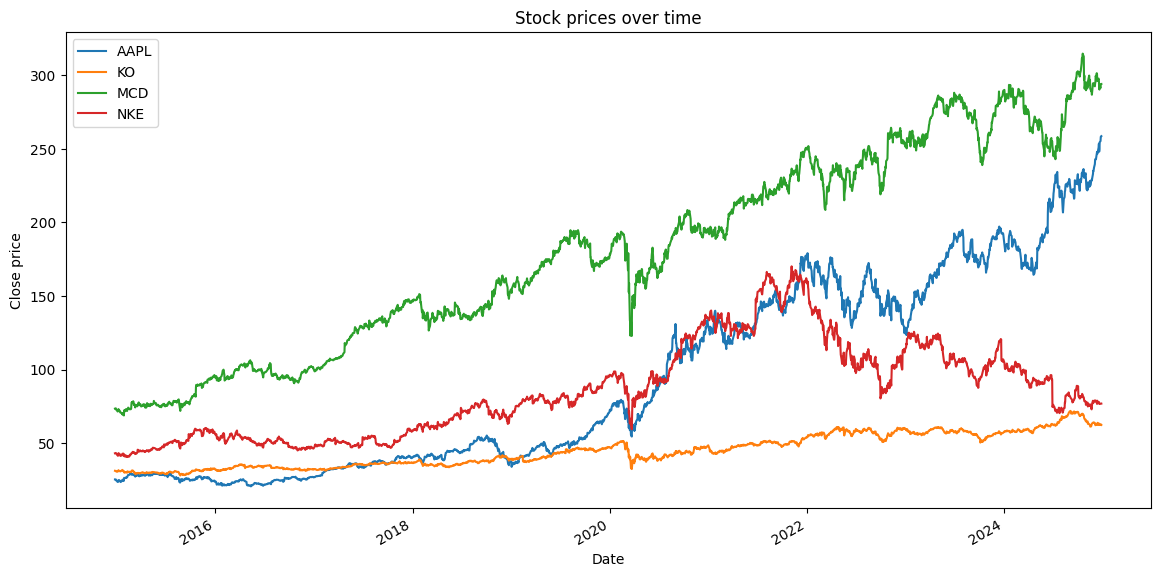

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = data.pivot_table(values='Close', index='Date', columns='Ticker')
pivot_df.plot(figsize=(14, 7))
plt.title('Stock prices over time')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(loc='best')
plt.show()

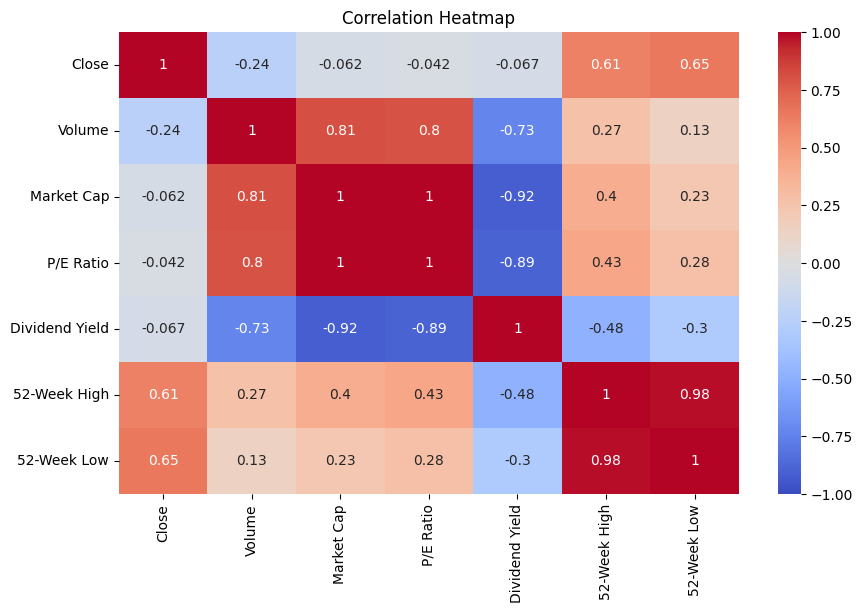

In [8]:
corr_features = ['Close', 'Volume', 'Market Cap','P/E Ratio', 'Dividend Yield', '52-Week High', '52-Week Low']
corr_data = data[corr_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
X = data[['Close', 'Market Cap', '52-Week High', '52-Week Low']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 3.6575424180408294


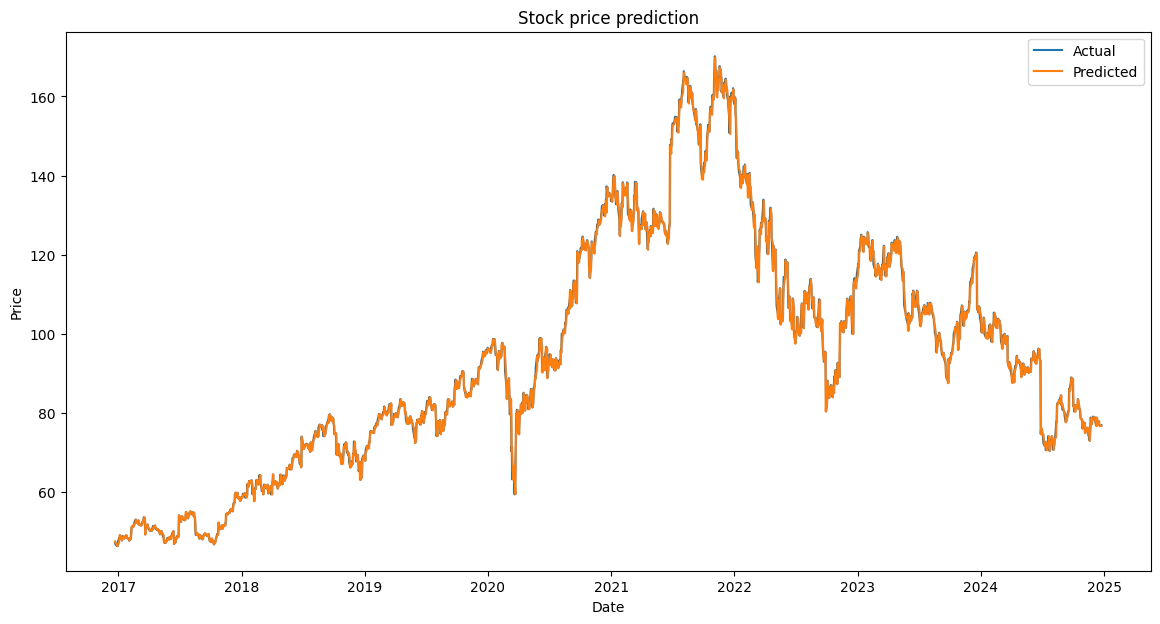

In [12]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Stock price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
lasso = Lasso()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso, params, cv=5)
grid_search_lasso.fit(X_train, y_train)

lasso_pred = grid_search_lasso.best_estimator_.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")

/Users/roberto/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.219e+04, tolerance: 4.067e+03
  model = cd_fast.enet_coordinate_descent(
/Users/roberto/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.271e+04, tolerance: 4.186e+03
  model = cd_fast.enet_coordinate_descent(
/Users/roberto/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

Lasso Regression Mean Squared Error: 3.6561014633472135


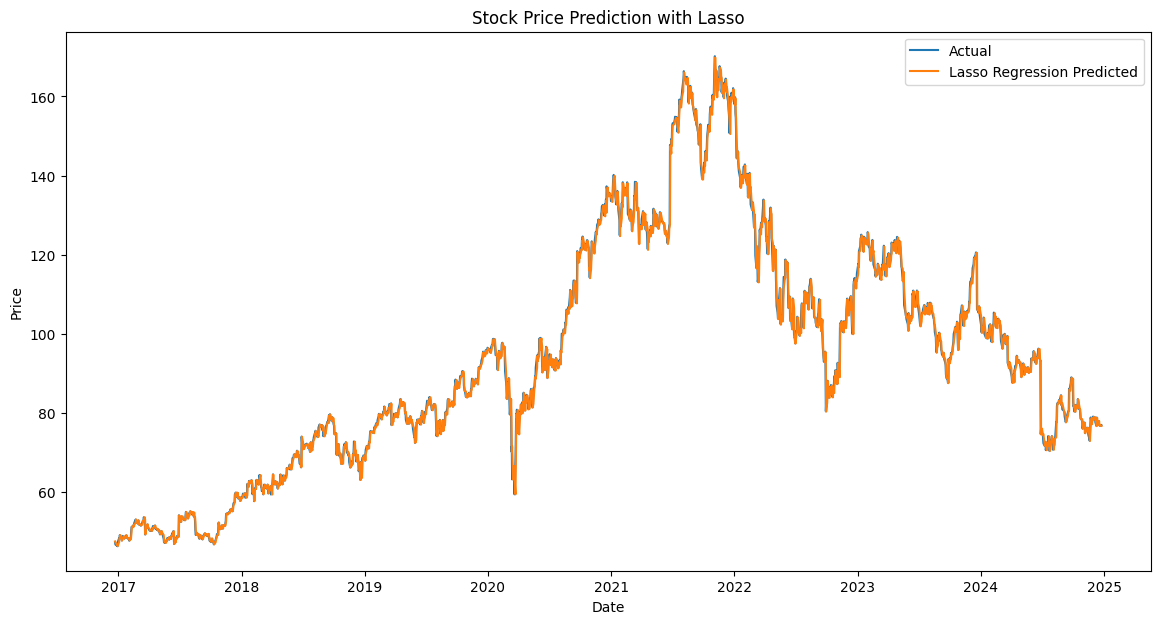

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, lasso_pred, label='Lasso Regression Predicted')
plt.title('Stock Price Prediction with Lasso')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Saved AAPL_data.csv


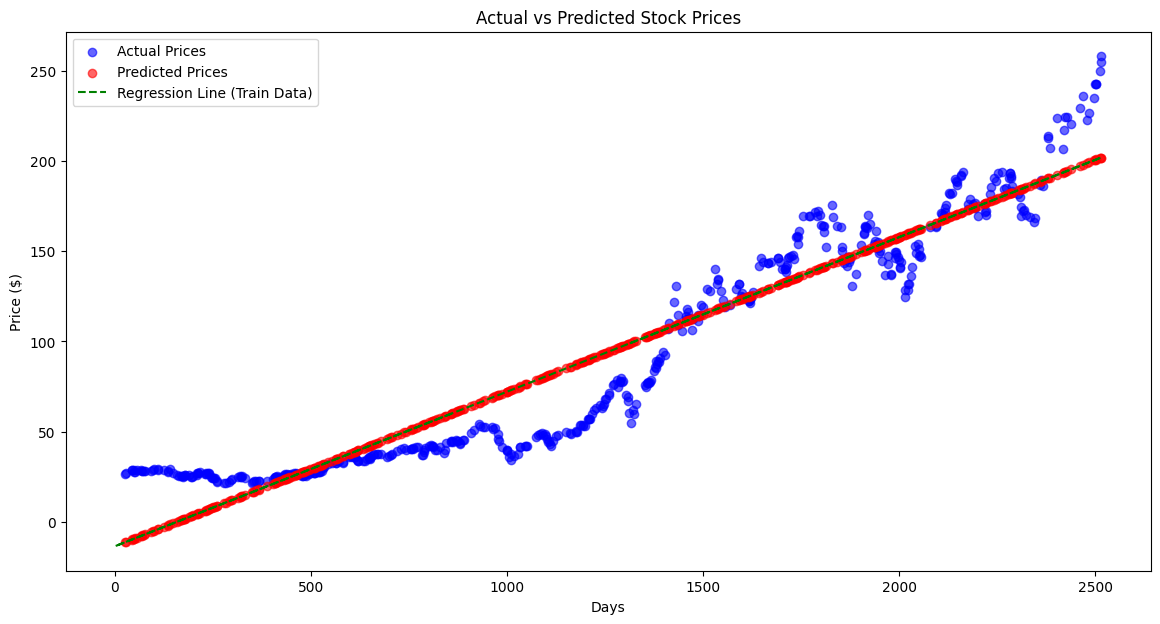

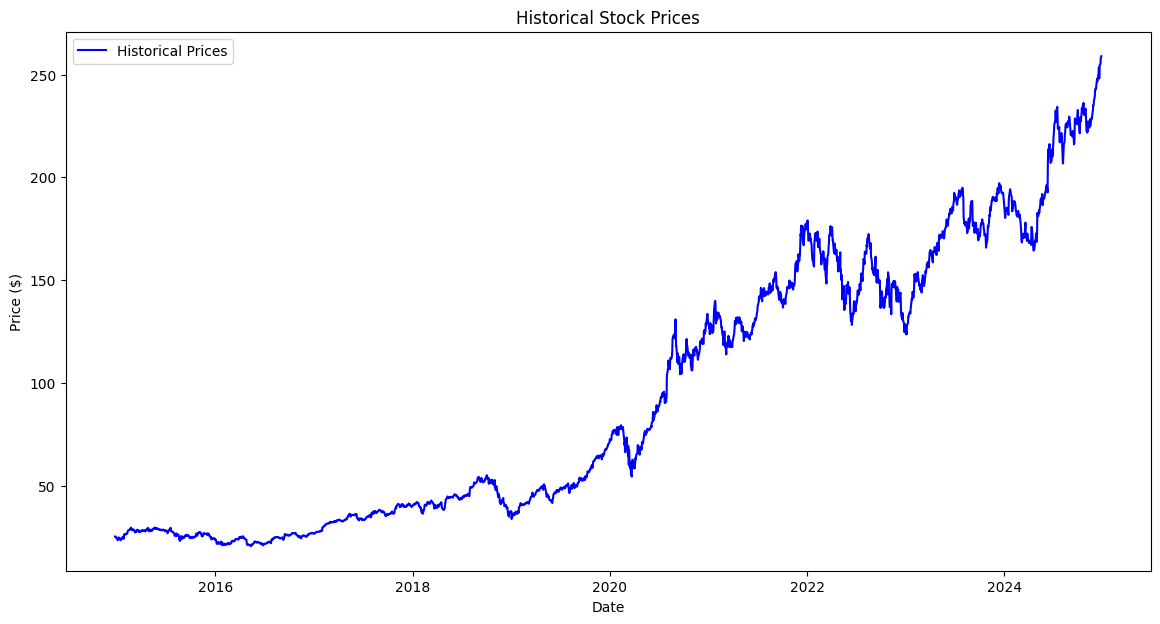

Mean Squared Error (MSE): 400.2254860750428
Mean Absolute Error (MAE): 15.987715573173741
R-squared (R²): 0.9013323570816948


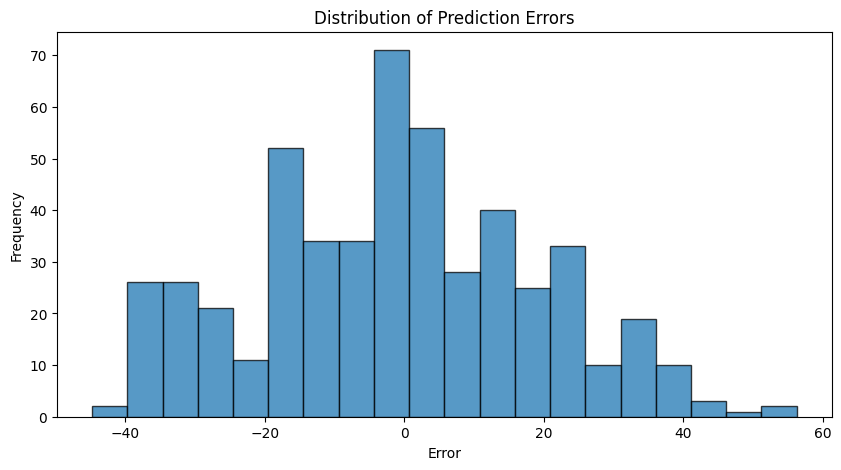

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fetch stock data
# Note: This step is already in your notebook; skipping execution if data is already downloaded
stocks = ["AAPL"]
def fetch_stock_data(stocks):
    for stock in stocks:
        ticker = yf.Ticker(stock)
        hist = ticker.history(period="10y")
        hist['Ticker'] = stock
        filename = f"{stock}_data.csv"
        hist.to_csv(filename)
        print(f"Saved {filename}")

fetch_stock_data(stocks)

# Load the stock data
# Replace 'AAPL_data.csv' with the file corresponding to your stock
data = pd.read_csv("AAPL_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure only relevant columns are selected
data = data[["Close"]].dropna()

# Add a 'Days' column for numerical indexing
data['Days'] = np.arange(len(data))

# Split the data into training and testing sets
X = data['Days'].values.reshape(-1, 1)
y = data['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Visualization: Actual vs Predicted prices
plt.figure(figsize=(14, 7))
plt.scatter(X_test, y_test, label="Actual Prices", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred, label="Predicted Prices", color="red", alpha=0.6)
plt.plot(X_train, model.predict(X_train), label="Regression Line (Train Data)", linestyle="--", color="green")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# Visualization: Historical Prices
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label="Historical Prices", color="blue")
plt.title("Historical Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Visualization: Error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=20, alpha=0.75, edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

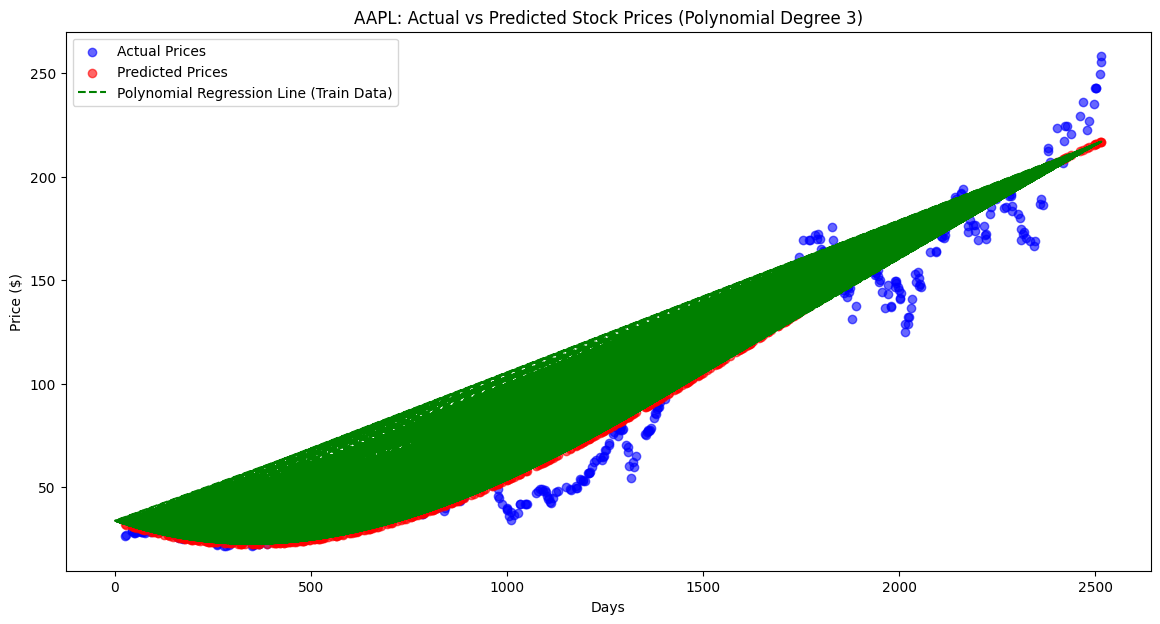

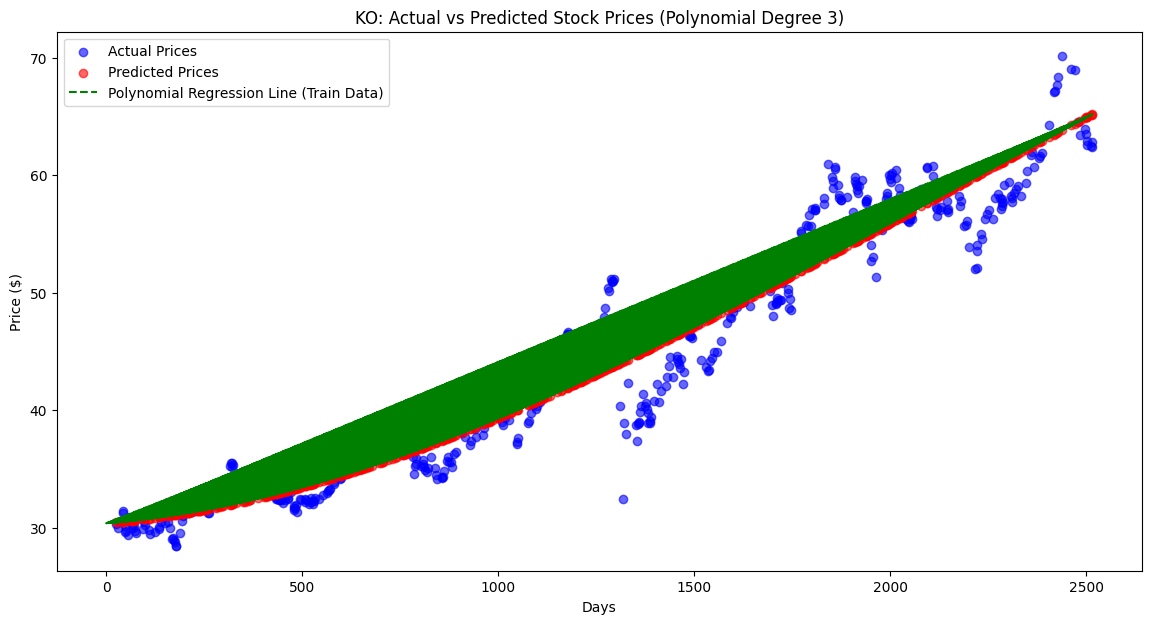

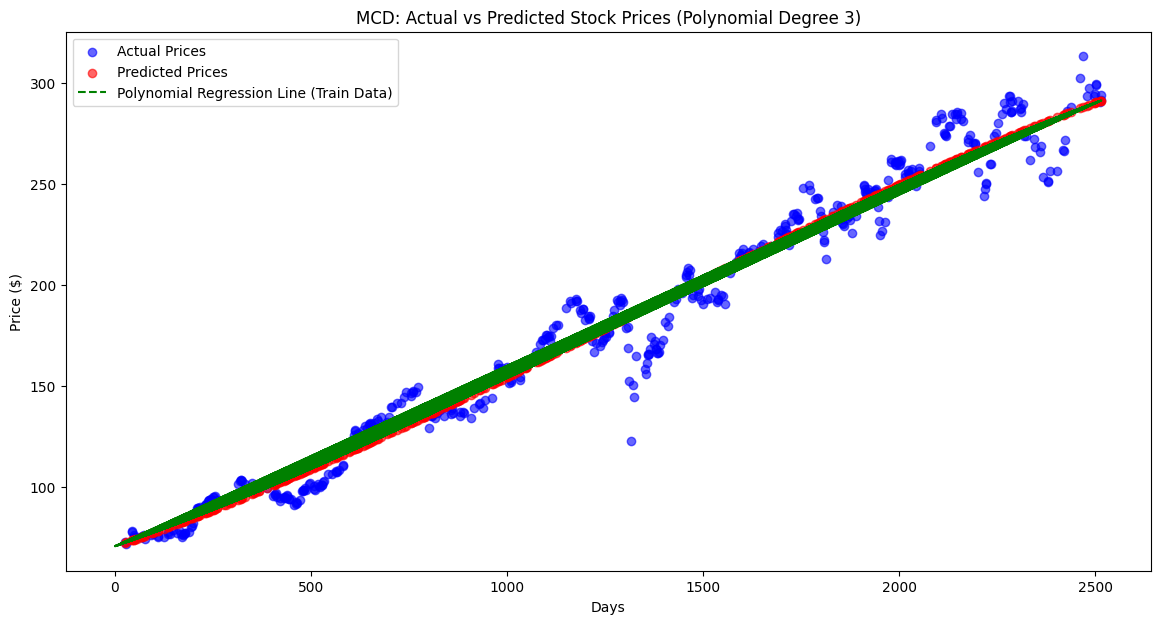

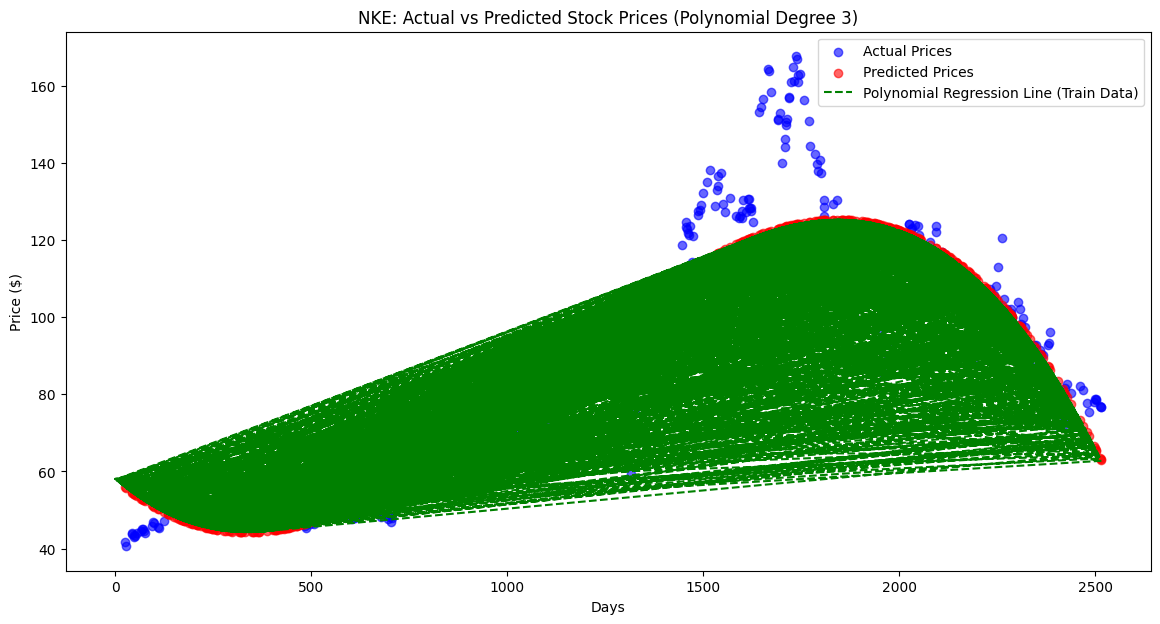

Performance Metrics for All Stocks:

AAPL:
  Mean Squared Error (MSE): 180.67590140420532
  Mean Absolute Error (MAE): 10.021003879859347
  R-squared (R²): 0.9554579455394079

KO:
  Mean Squared Error (MSE): 8.112117163161793
  Mean Absolute Error (MAE): 2.1736050594528895
  R-squared (R²): 0.9298960015194682

MCD:
  Mean Squared Error (MSE): 127.8748324297869
  Mean Absolute Error (MAE): 8.689245934649831
  R-squared (R²): 0.9714887569987123

NKE:
  Mean Squared Error (MSE): 170.68007966712614
  Mean Absolute Error (MAE): 9.470714226378567
  R-squared (R²): 0.829012992975095


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of stock symbols
stocks = ["AAPL", "KO", "MCD", "NKE"]

# Initialize a dictionary to store results
results = {}

# Degree of polynomial (adjust as needed)
poly_degree = 3

for stock in stocks:
    # Load the data for each stock
    file_name = f"{stock}_data.csv"  # Ensure these CSVs exist in the working directory
    data = pd.read_csv(file_name, parse_dates=["Date"], index_col="Date")
    
    # Check if 'Close' column exists
    if "Close" not in data.columns:
        print(f"Skipping {stock}: 'Close' column not found.")
        continue

    # Prepare the data
    data = data[["Close"]].dropna()
    data['Days'] = np.arange(len(data))
    
    # Split the data into training and testing sets
    X = data['Days'].values.reshape(-1, 1)
    y = data['Close'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Transform data for polynomial regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train a Polynomial Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Generate predictions
    y_pred = model.predict(X_test_poly)

    # Store error metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[stock] = {"MSE": mse, "MAE": mae, "R²": r2}

    # Visualization: Actual vs Predicted prices
    plt.figure(figsize=(14, 7))
    plt.scatter(X_test, y_test, label="Actual Prices", color="blue", alpha=0.6)
    plt.scatter(X_test, y_pred, label="Predicted Prices", color="red", alpha=0.6)
    plt.plot(X_train, model.predict(X_train_poly), label="Polynomial Regression Line (Train Data)", linestyle="--", color="green")
    plt.title(f"{stock}: Actual vs Predicted Stock Prices (Polynomial Degree {poly_degree})")
    plt.xlabel("Days")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()

# Display metrics for all stocks
print("Performance Metrics for All Stocks:")
for stock, metrics in results.items():
    print(f"\n{stock}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"  R-squared (R²): {metrics['R²']}")

In [25]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth for complexity
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Performance Metrics for All Stocks and Models:

AAPL:
  Linear Regression:
    MSE: 400.225602239452
    MAE: 15.987714548207853
    R²: 0.9013323280364272
  Polynomial Regression:
    MSE: 180.67590140420532
    MAE: 10.021003879859347
    R²: 0.9554579455394079
  Decision Tree:
    MSE: 30.353596201176416
    MAE: 3.741322343520455
    R²: 0.9925169238146324
  Random Forest:
    MSE: 2.6466563765826225
    MAE: 0.9653705953037923
    R²: 0.9993475194447737

KO:
  Linear Regression:
    MSE: 9.52494845061819
    MAE: 2.4066271474753065
    R²: 0.9176864734225532
  Polynomial Regression:
    MSE: 8.112117163161793
    MAE: 2.1736050594528895
    R²: 0.9298960015194682
  Decision Tree:
    MSE: 1.7491555585523324
    MAE: 0.9587605648367248
    R²: 0.9848839956138932
  Random Forest:
    MSE: 0.15414012574560654
    MAE: 0.27459146045503163
    R²: 0.9986679384772535

MCD:
  Linear Regression:
    MSE: 132.17252097384664
    MAE: 8.935719925848826
    R²: 0.9705305352744271
  Polynomia

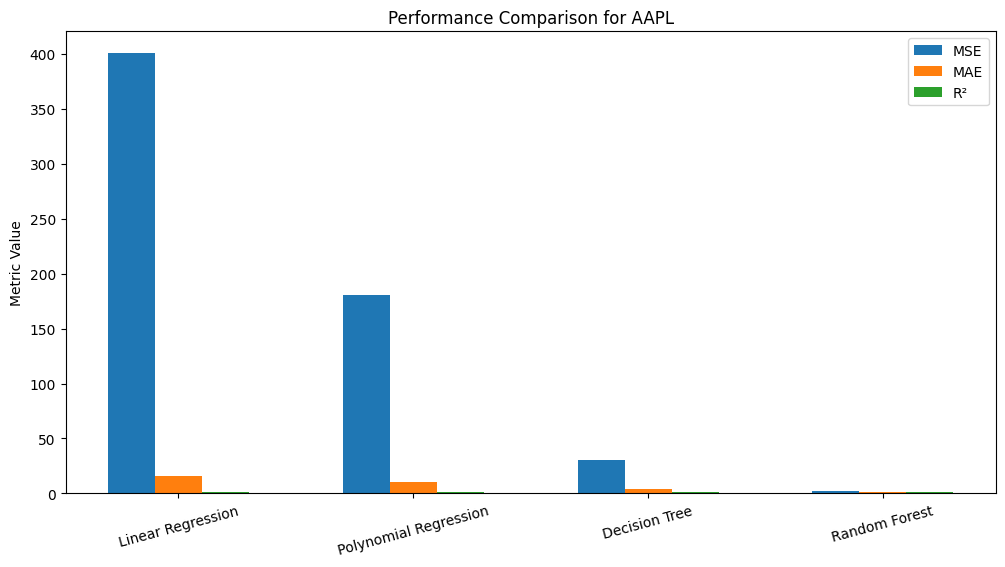

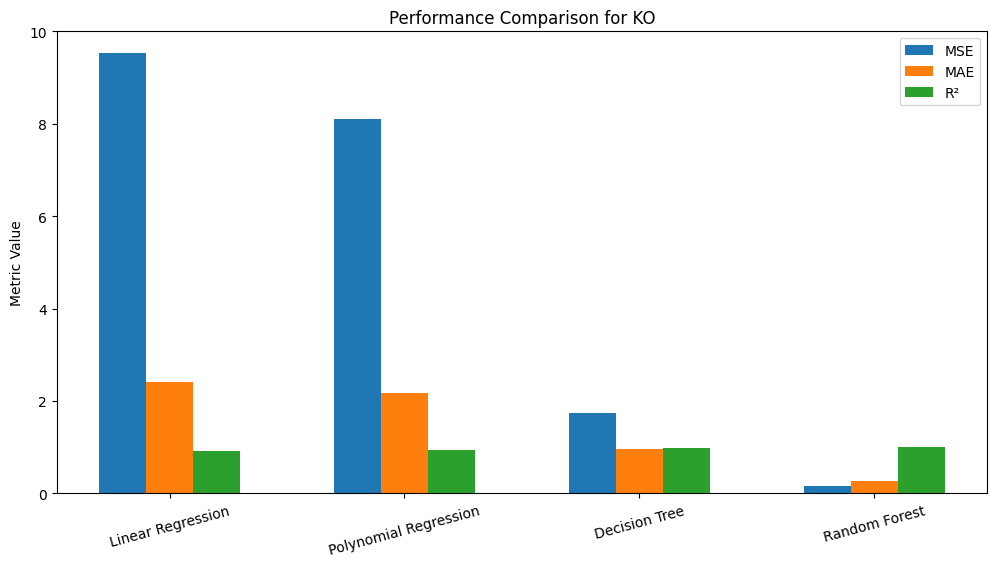

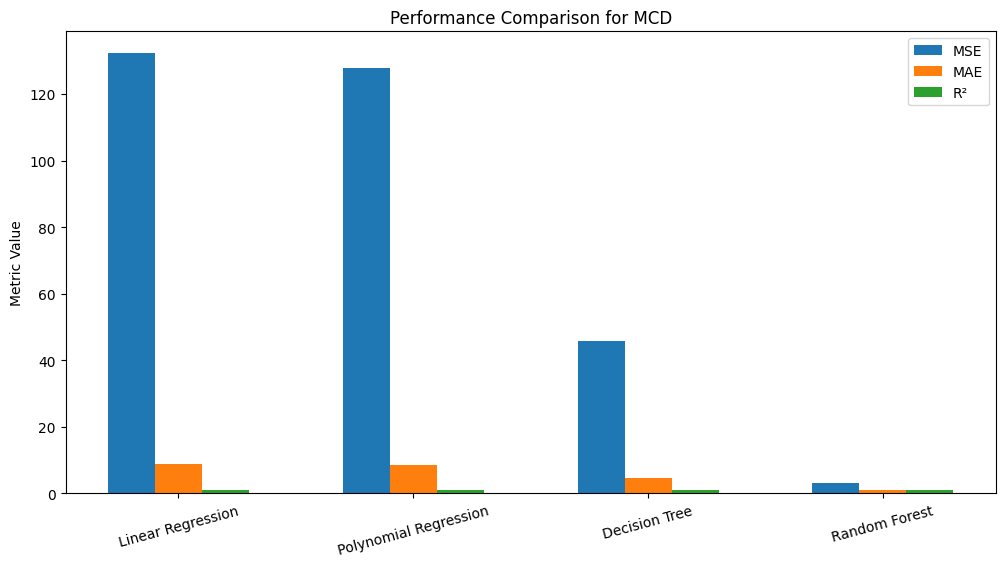

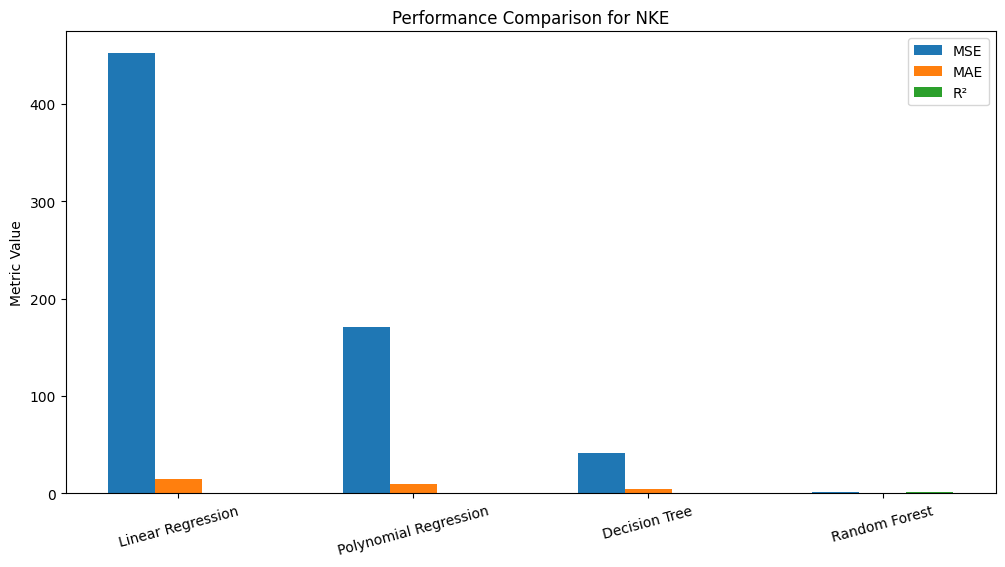

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of stock symbols
stocks = ["AAPL", "KO", "MCD", "NKE"]

# Initialize results storage
results = {}

# Degree for Polynomial Regression
poly_degree = 3

# Iterate through each stock
for stock in stocks:
    file_name = f"{stock}_data.csv"
    data = pd.read_csv(file_name, parse_dates=["Date"], index_col="Date")
    
    # Ensure the 'Close' column exists
    if "Close" not in data.columns:
        print(f"Skipping {stock}: 'Close' column not found.")
        continue

    # Prepare the data
    data = data[["Close"]].dropna()
    data['Days'] = np.arange(len(data))

    # Split the data
    X = data['Days'].values.reshape(-1, 1)
    y = data['Close'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Store metrics for all models
    results[stock] = {}

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_lr = linear_model.predict(X_test)
    results[stock]["Linear Regression"] = {
        "MSE": mean_squared_error(y_test, y_pred_lr),
        "MAE": mean_absolute_error(y_test, y_pred_lr),
        "R²": r2_score(y_test, y_pred_lr),
    }

    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    results[stock]["Polynomial Regression"] = {
        "MSE": mean_squared_error(y_test, y_pred_poly),
        "MAE": mean_absolute_error(y_test, y_pred_poly),
        "R²": r2_score(y_test, y_pred_poly),
    }

    # Decision Tree
    tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    results[stock]["Decision Tree"] = {
        "MSE": mean_squared_error(y_test, y_pred_tree),
        "MAE": mean_absolute_error(y_test, y_pred_tree),
        "R²": r2_score(y_test, y_pred_tree),
    }

    # Random Forest
    forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    forest_model.fit(X_train, y_train)
    y_pred_rf = forest_model.predict(X_test)
    results[stock]["Random Forest"] = {
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "R²": r2_score(y_test, y_pred_rf),
    }

# Print metrics for all models
print("\nPerformance Metrics for All Stocks and Models:")
for stock, metrics in results.items():
    print(f"\n{stock}:")
    for model_name, model_metrics in metrics.items():
        print(f"  {model_name}:")
        for metric_name, value in model_metrics.items():
            print(f"    {metric_name}: {value}")

# Optional: Visualize Comparison as a Bar Chart
for stock, metrics in results.items():
    labels = list(metrics.keys())
    mse_values = [metrics[model]["MSE"] for model in labels]
    mae_values = [metrics[model]["MAE"] for model in labels]
    r2_values = [metrics[model]["R²"] for model in labels]

    x = np.arange(len(labels))

    plt.figure(figsize=(12, 6))
    plt.bar(x - 0.2, mse_values, width=0.2, label="MSE")
    plt.bar(x, mae_values, width=0.2, label="MAE")
    plt.bar(x + 0.2, r2_values, width=0.2, label="R²")
    plt.title(f"Performance Comparison for {stock}")
    plt.xticks(x, labels, rotation=15)
    plt.ylabel("Metric Value")
    plt.legend()
    plt.show()

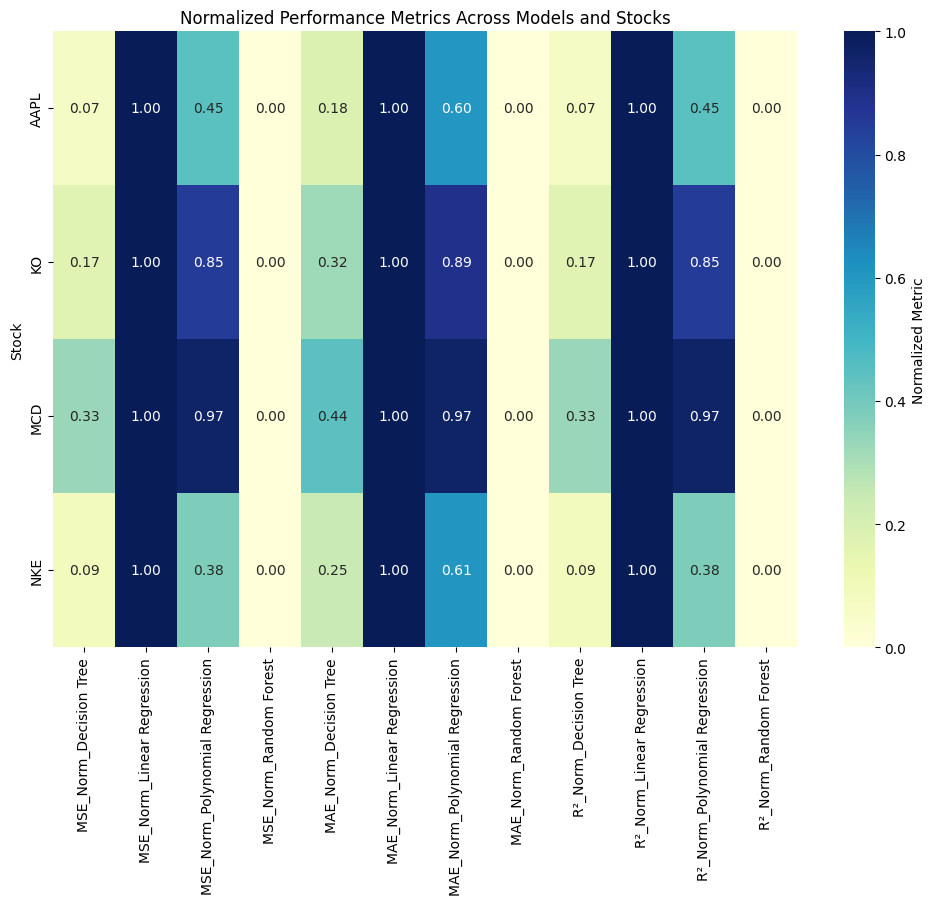

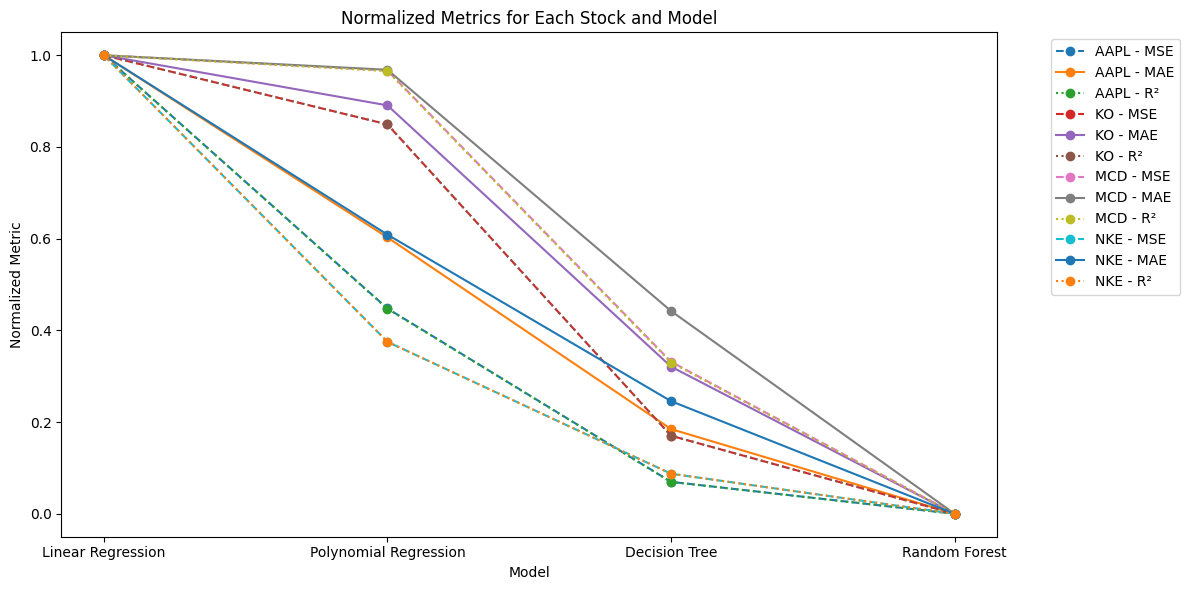

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example results dictionary from the output
results = {
    "AAPL": {
        "Linear Regression": {"MSE": 400.2256, "MAE": 15.9877, "R²": 0.9013},
        "Polynomial Regression": {"MSE": 180.6759, "MAE": 10.0210, "R²": 0.9555},
        "Decision Tree": {"MSE": 30.3536, "MAE": 3.7413, "R²": 0.9925},
        "Random Forest": {"MSE": 2.6467, "MAE": 0.9654, "R²": 0.9993},
    },
    "KO": {
        "Linear Regression": {"MSE": 9.5249, "MAE": 2.4066, "R²": 0.9177},
        "Polynomial Regression": {"MSE": 8.1121, "MAE": 2.1736, "R²": 0.9299},
        "Decision Tree": {"MSE": 1.7492, "MAE": 0.9588, "R²": 0.9849},
        "Random Forest": {"MSE": 0.1541, "MAE": 0.2746, "R²": 0.9987},
    },
    "MCD": {
        "Linear Regression": {"MSE": 132.1725, "MAE": 8.9357, "R²": 0.9705},
        "Polynomial Regression": {"MSE": 127.8748, "MAE": 8.6892, "R²": 0.9715},
        "Decision Tree": {"MSE": 45.8376, "MAE": 4.5934, "R²": 0.9898},
        "Random Forest": {"MSE": 3.0043, "MAE": 1.1501, "R²": 0.9993},
    },
    "NKE": {
        "Linear Regression": {"MSE": 451.8734, "MAE": 14.9524, "R²": 0.5473},
        "Polynomial Regression": {"MSE": 170.6801, "MAE": 9.4707, "R²": 0.8290},
        "Decision Tree": {"MSE": 41.2453, "MAE": 4.3811, "R²": 0.9587},
        "Random Forest": {"MSE": 1.9240, "MAE": 0.9384, "R²": 0.9981},
    },
}

# Normalize metrics for each stock and model
metrics_df = []
for stock, models in results.items():
    for model, metrics in models.items():
        metrics_df.append([stock, model, metrics["MSE"], metrics["MAE"], metrics["R²"]])

df = pd.DataFrame(metrics_df, columns=["Stock", "Model", "MSE", "MAE", "R²"])

# Normalize MSE and MAE (lower is better), invert R² (higher is better)
df["MSE_Norm"] = df.groupby("Stock")["MSE"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["MAE_Norm"] = df.groupby("Stock")["MAE"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df["R²_Norm"] = df.groupby("Stock")["R²"].transform(lambda x: (x.max() - x) / (x.max() - x.min()))

# Create a heatmap-friendly format
heatmap_data = df.pivot(index="Stock", columns="Model", values=["MSE_Norm", "MAE_Norm", "R²_Norm"])
heatmap_data.columns = ["_".join(col).strip() for col in heatmap_data.columns.values]

# Heatmap Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"label": "Normalized Metric"})
plt.title("Normalized Performance Metrics Across Models and Stocks")
plt.show()

# Line Plot Visualization
plt.figure(figsize=(12, 6))
for stock in df["Stock"].unique():
    stock_data = df[df["Stock"] == stock]
    plt.plot(
        stock_data["Model"], stock_data["MSE_Norm"], label=f"{stock} - MSE", linestyle="--", marker="o"
    )
    plt.plot(
        stock_data["Model"], stock_data["MAE_Norm"], label=f"{stock} - MAE", linestyle="-", marker="o"
    )
    plt.plot(
        stock_data["Model"], stock_data["R²_Norm"], label=f"{stock} - R²", linestyle=":", marker="o"
    )

plt.title("Normalized Metrics for Each Stock and Model")
plt.xlabel("Model")
plt.ylabel("Normalized Metric")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Analysis of Model Performance on Stock Data

## Introduction

The analysis investigates the performance of four predictive models—Linear Regression, Polynomial Regression, Decision Tree, and Random Forest—on stock price data for four companies: AAPL (Apple), KO (Coca-Cola), MCD (McDonald's), and NKE (Nike). Metrics considered include Mean Squared Error (MSE), Mean Absolute Error (MAE), and \( R^2 \), normalized for comparability. The models are evaluated for their ability to handle trends and non-linearities in the data.

## Results Overview

### Heatmap of Normalized Metrics

The heatmap presents normalized MSE, MAE, and inverted \( R^2 \) values across all models and stocks. Lower values indicate better performance, and the key observations are as follows:

1. **Random Forest** consistently outperforms other models:
   - Achieves near-zero normalized MSE and MAE for all stocks.
   - Maintains \( R^2 \) values close to 0 (highest absolute \( R^2 \) values when unnormalized), indicating exceptional predictive accuracy.

2. **Decision Tree** shows strong performance but is less consistent:
   - While it performs well for AAPL, KO, and MCD, it is slightly less effective than Random Forest.
   - For NKE, it shows relatively higher normalized MSE and MAE.

3. **Polynomial Regression** moderately improves over Linear Regression:
   - Reduces MSE and MAE for AAPL, KO, and NKE, but fails to compete with tree-based models.
   - \( R^2 \) values suggest limited ability to handle complex patterns compared to tree-based methods.

4. **Linear Regression** exhibits the poorest performance:
   - Struggles with stocks like NKE and AAPL that exhibit non-linear trends.
   - High normalized MSE and MAE values indicate its inability to adapt to data complexity.

---

### Line Plot of Normalized Metrics

The line plot illustrates trends in normalized metrics for each stock, further emphasizing the performance differences among models:

1. **Consistent Decline Towards Random Forest**:
   - For all metrics, a significant reduction is observed as models progress from Linear Regression to Polynomial Regression, Decision Tree, and finally Random Forest.
   - Random Forest achieves the steepest decline, particularly for MSE and MAE.

2. **Stock-Specific Observations**:
   - **AAPL**: Exhibits complex trends that are poorly captured by Linear Regression but are handled well by tree-based models.
   - **KO**: Relatively simple trends result in decent performance for Polynomial Regression and Decision Tree, but Random Forest still excels.
   - **MCD**: Similar to KO, indicating less volatile or complex price patterns.
   - **NKE**: Shows the largest performance gap between tree-based models and regression methods, reflecting high non-linearity in price trends.

---

## Detailed Commentary on Models

### Random Forest
Random Forest consistently outperforms due to its ensemble nature, reducing overfitting and capturing complex interactions in the data. It achieves near-perfect \( R^2 \) and minimal error metrics, making it the optimal choice for predictive accuracy.

### Decision Tree
While Decision Tree models show strong results, their performance is slightly inferior to Random Forest. They are prone to overfitting when used alone, as seen in higher normalized error values for NKE compared to Random Forest.

### Polynomial Regression
Polynomial Regression moderately improves over Linear Regression by fitting non-linear patterns but lacks the flexibility of tree-based methods. It struggles with stocks exhibiting significant non-linearity (e.g., NKE and AAPL).

### Linear Regression
Linear Regression is insufficient for modeling stock price trends due to its inability to capture non-linear relationships. Its high error metrics and low \( R^2 \) values highlight this limitation, especially for volatile stocks like NKE.

---

## Implications and Recommendations

### Model Selection
- **Random Forest** is the most reliable model for stock price prediction, especially for complex and volatile stocks like AAPL and NKE.
- **Decision Tree** can serve as a simpler alternative when computational efficiency is a priority but may require hyperparameter tuning to avoid overfitting.
- Regression models (Linear and Polynomial) are suitable only for stocks with simple, linear trends (e.g., KO and MCD).

### Future Directions
1. **Hyperparameter Optimization**:
   - Fine-tuning Random Forest (e.g., adjusting the number of trees, maximum depth) and Decision Tree can further enhance their performance.
2. **Alternative Models**:
   - Exploring Gradient Boosting methods (e.g., XGBoost, LightGBM) for potentially better performance.
3. **Feature Engineering**:
   - Incorporating additional features (e.g., technical indicators, macroeconomic factors) to improve model predictive power.
4. **Longer-Term Analysis**:
   - Extending the analysis to multi-step predictions and evaluating time-series-specific models (e.g., LSTMs, ARIMA).

---

## Conclusion

The analysis demonstrates that tree-based models, particularly Random Forest, are superior for stock price prediction due to their robustness and ability to model non-linear relationships. While regression models may suffice for simpler stocks, they fall short in handling complex trends. These findings guide the selection of predictive models for financial forecasting tasks, highlighting the importance of model flexibility and accuracy.